In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercice 3

# à faire: Enoncé en latex

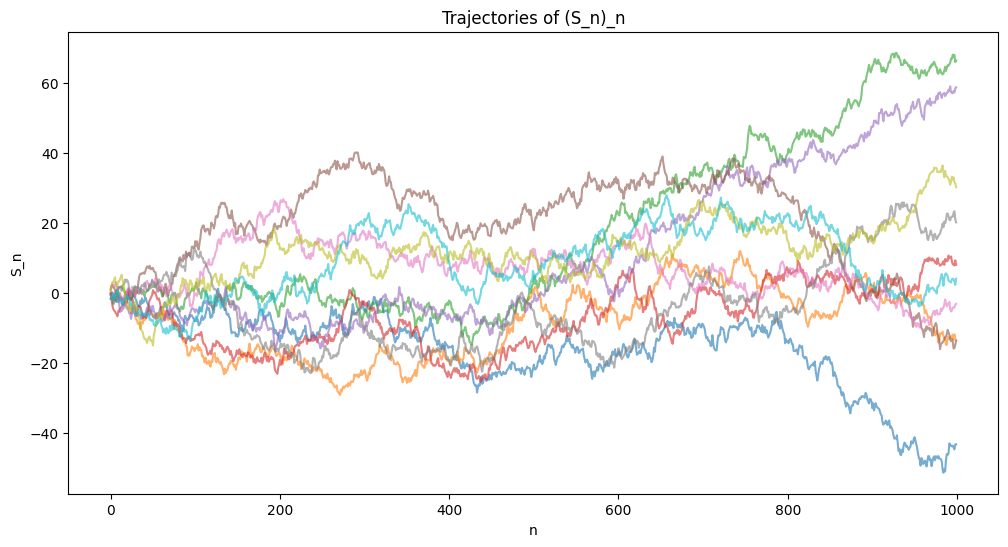

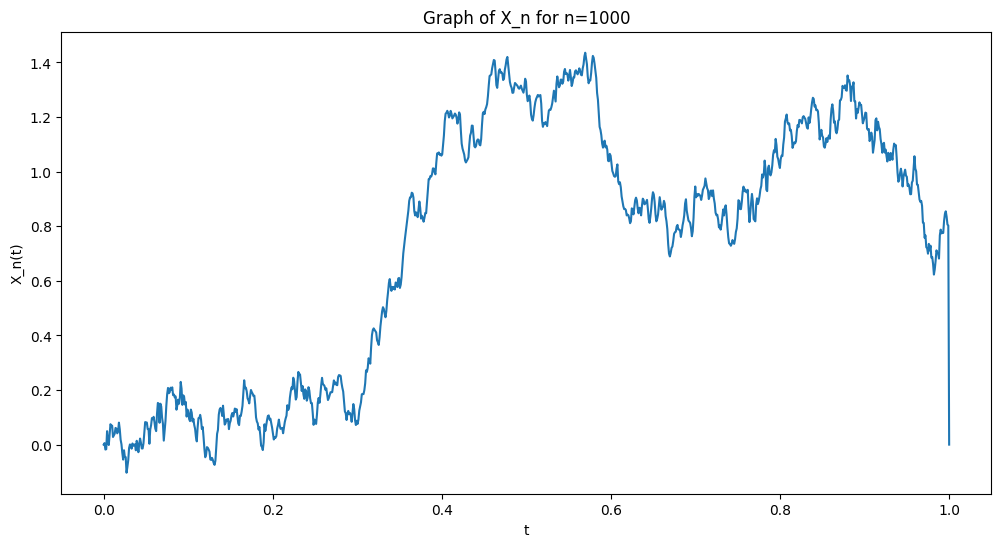

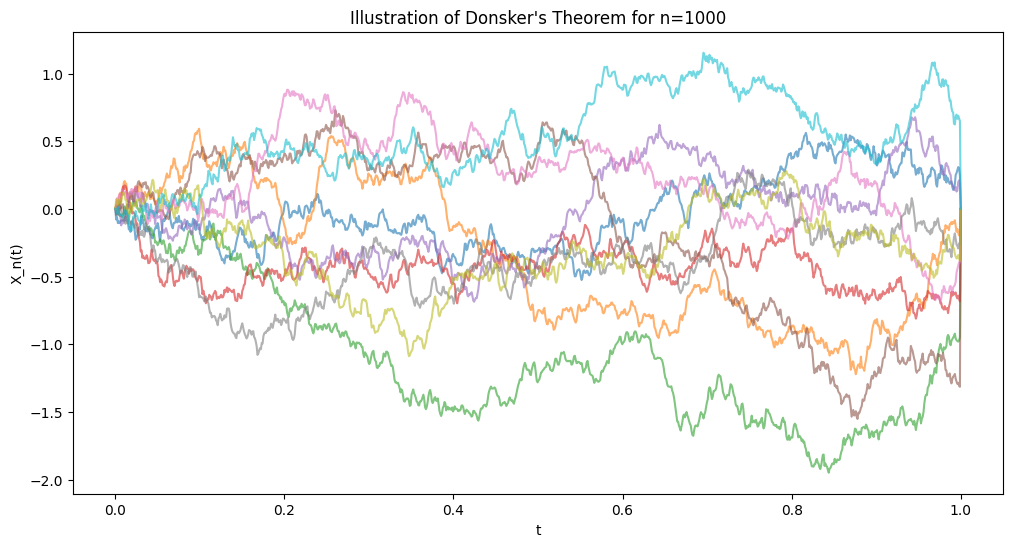

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 1000  # Total number of steps for the random walk
n = 1000  # Number of steps for the interpolation
num_simulations = 10  # Number of simulations

# 1. Plotting the trajectories of (S_n)_n
def simulate_random_walk(N):
    X = np.random.normal(0, 1, N)  # i.i.d. normal random variables
    S = np.cumsum(X)  # Cumulative sum to get S_n
    return S

plt.figure(figsize=(12, 6))
for _ in range(num_simulations):
    S = simulate_random_walk(N)
    plt.plot(S, alpha=0.6)
plt.title("Trajectories of (S_n)_n")
plt.xlabel("n")
plt.ylabel("S_n")
plt.show()

# 2. Plotting the graph of X_n
def interpolate_random_walk(n):
    t_values = np.linspace(0, 1, n)
    X = np.random.normal(0, 1, n)
    X_n_t = np.zeros_like(t_values)
    
    for i, t in enumerate(t_values):
        k = int(np.floor(n * t))
        frac = n * t - k
        if k < n:
            X_n_t[i] = (1 / np.sqrt(n)) * (np.sum(X[:k]) + frac * X[k])
    
    return t_values, X_n_t

t_values, X_n_t = interpolate_random_walk(n)

plt.figure(figsize=(12, 6))
plt.plot(t_values, X_n_t)
plt.title(f"Graph of X_n for n={n}")
plt.xlabel("t")
plt.ylabel("X_n(t)")
plt.show()

# 3. Illustrating Donsker's theorem
def simulate_donsker_theorem(n):
    t_values = np.linspace(0, 1, n)
    X_n_t = np.zeros((num_simulations, len(t_values)))
    
    for i in range(num_simulations):
        _, X_n_t[i, :] = interpolate_random_walk(n)
    
    return t_values, X_n_t

t_values, X_n_t = simulate_donsker_theorem(n)

plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(t_values, X_n_t[i, :], alpha=0.6)
plt.title(f"Illustration of Donsker's Theorem for n={n}")
plt.xlabel("t")
plt.ylabel("X_n(t)")
plt.show()


Steps:
- Simulates and plots the trajectories of the random walk Sn
- Interpolates and normalizes the random walk to obtain Xn(t) and plots it for a fixed n
- Simulates and plots multiple trajectories to illustrate Donsker's theorem for a large n

Analyse en français:

Figure 1 :(question 1)

${Observations}$

Les trajectoires individuelles montrent des fluctuations autour de zéro, ce qui est cohérent avec la propriété que les variables $X_k$ sont centrées (moyenne nulle). Les écarts-types des trajectoires augmentent avec le nombre de pas $n$, illustrant la diffusion et la croissance quadratique de la variance, une caractéristique des processus de marche aléatoire.

$Interprétation$

Les trajectoires montrent la nature aléatoire des marches discrètes, avec des déviations plus importantes pour des valeurs plus élevées de $n$. Ces déviations illustrent le comportement diffusif typique des marches aléatoires, où la distance moyenne de la marche à l'origine augmente proportionnellement à la racine carrée du nombre de pas.


Figure 2 :(question 2)

$Observations$

La trajectoire fluctue autour de zéro, avec des variations de plus en plus marquées à mesure que $t$ augmente. La continuité de la trajectoire est maintenue, avec des fluctuations qui montrent une tendance à se diffuser plus largement pour des $t$ plus grands.

$Interprétation$

La trajectoire montre une convergence qualitative vers un mouvement brownien, où la variance augmente linéairement avec $t$. La normalisation par $sqrt{n}$ permet d'observer cette convergence en réduisant l'échelle des fluctuations en fonction de $n $, facilitant ainsi la comparaison avec un processus de Wiener.


Figure 2 :(question 2)

$Observations$
Les trajectoires montrent des fluctuations autour de zéro, avec des écarts-types qui augmentent avec $t$. La figure montre une densité accrue des trajectoires près de zéro au début $(  t \approx 0  )$ et une dispersion croissante à mesure que $t$ augmente.

Interprétation
Cette convergence vers un processus de Wiener est illustrée par la similarité des trajectoires, qui présentent des caractéristiques statistiques du mouvement brownien, comme l'indépendance des incréments et la continuité. Les trajectoires se dispersent de manière cohérente avec une croissance quadratique de la variance, $\( \mathbb{E}[B_t^2] = t \)$ pour un processus brownien standard $\( B_t \)$.


# Exercice 4

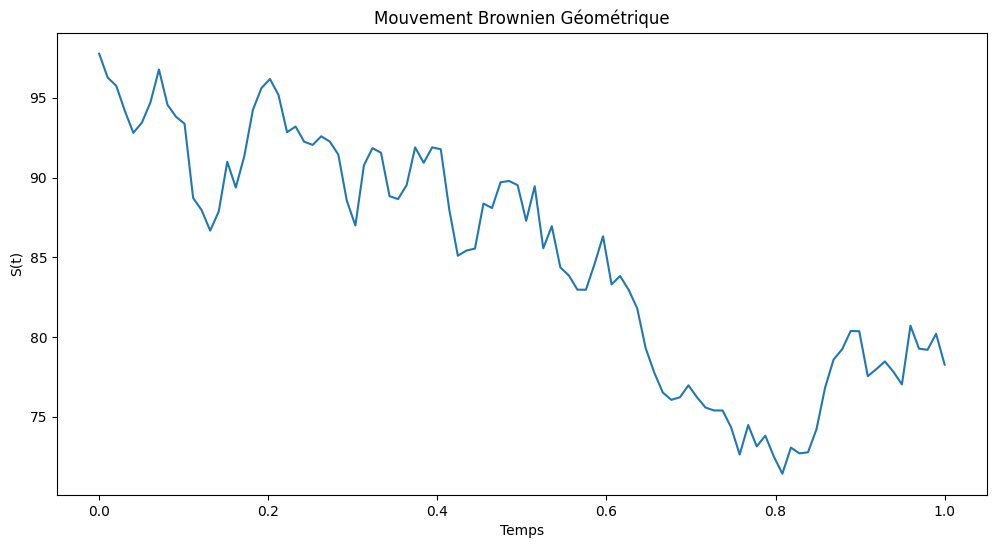

In [16]:
# Parameters
S0 = 100  # Initial value
mu = 0.1  # Drift coefficient
diff = 0.2  # Diffusion coefficient
T = 1.0  # Time horizon
dt = 0.01  # Time step
N = int(T / dt)  # Number of steps
t = np.linspace(0, T, N)

Bt = np.random.normal(0, np.sqrt(dt), N).cumsum()

def geometric_borwnian_motion(S0, Bt, mu, diff):
    
    """
    Process of a geometric brownian motion

    Parameters:
    S0 (float): Initial value of the process.
    Bt (array) : Brownian motion drifted by mu with diffusion coefficient diff
    mu (float) : drift coefficient
    diff (float) : diffusion coefficient

    Returns:
    array: Trajectory of the geometric brownian motion process.
    """

    t = len(Bt)
    St = S0 * np.exp( mu * t - (diff/2) * t + diff * Bt )
    return St

S = geometric_borwnian_motion(S0, Bt, mu, diff)

plt.figure(figsize=(12, 6))
plt.plot(t, S)
plt.title("Mouvement Brownien Géométrique")
plt.xlabel("Temps")
plt.ylabel("S(t)")
plt.show()

In [ ]:
# Construct the Brownian bridge
W = B - (t / t[-1]) * B[-1]

plt.figure(figsize=(12, 6))
plt.plot(t, W)
plt.title("Pont Brownien")
plt.xlabel("Temps")
plt.ylabel("W(t)")
plt.show()